### We import the libraries we are going to use.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Transforming datasets into dataframes
calendar = pd.read_csv('datasets/calendar.csv')
listings = pd.read_csv('datasets/listings.csv')
reviews = pd.read_csv('datasets/reviews.csv')

In [4]:
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,f,"$2,655.00","$2,655.00",5.0,1125.0
1,133654,2020-04-27,t,"$1,150.00","$1,150.00",4.0,1125.0
2,133654,2020-04-28,t,"$1,150.00","$1,150.00",4.0,1125.0


In [5]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16


In [6]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...


### we will see if it contains nulls

In [7]:
def visualize_missing_values(data):
    # Count null and non-null values per column
    missing_counts = data.isnull().sum()
    non_missing_counts = data.notnull().sum()

    # Calculate percentages
    total_counts = missing_counts + non_missing_counts
    missing_percentage = (missing_counts / total_counts) * 100
    non_missing_percentage = (non_missing_counts / total_counts) * 100

    # Set the size of the plot
    fig, ax = plt.subplots(figsize=(6, 4))

    # Create stacked bars
    bars1 = ax.barh(data.columns, missing_percentage, color='lightcoral', edgecolor='grey', label='Missing')
    bars2 = ax.barh(data.columns, non_missing_percentage, left=missing_percentage, color='lightblue', edgecolor='grey', label='Non-Missing')

    # Add labels and title
    ax.set_xlabel('Percentage')
    ax.set_title('Percentage of Missing and Non-Missing Values per Column')
    ax.legend()

    # Display the plot
    plt.show()


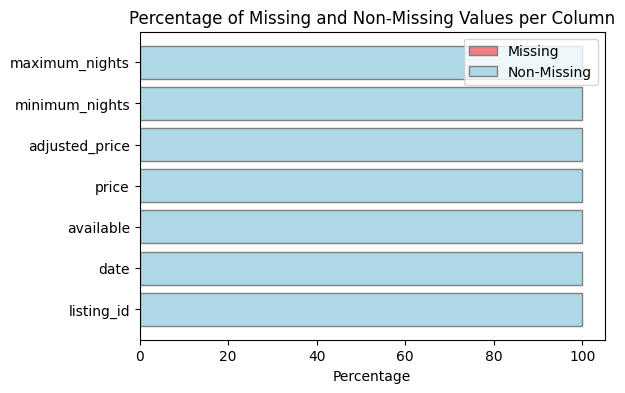

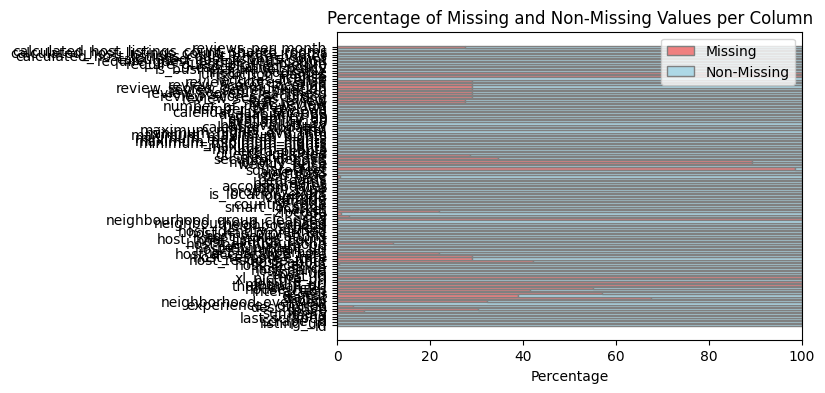

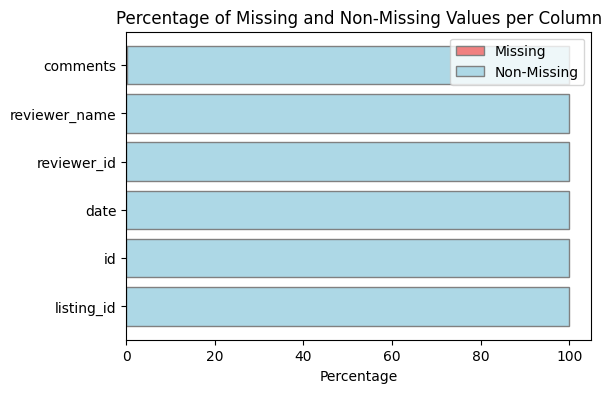

In [8]:
# We use the function to display the graphs.
visualize_missing_values(calendar)
visualize_missing_values(listings)
visualize_missing_values(reviews)

We can see that 2 of the 3 df do not contain null values. 

### We will start with an ETL with the DF called ‘Calendar’.

In [9]:
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,f,"$2,655.00","$2,655.00",5.0,1125.0
1,133654,2020-04-27,t,"$1,150.00","$1,150.00",4.0,1125.0
2,133654,2020-04-28,t,"$1,150.00","$1,150.00",4.0,1125.0


contains the columns (‘minimum_nights’ and ‘maximum_nights’)

In [10]:
calendar['maximum_nights'].unique()

array([1.1250e+03, 4.0000e+00, 9.0000e+01, 1.8000e+02, 7.3000e+02,
       3.6000e+02, 3.6500e+02, 2.0000e+02, 1.5000e+01, 1.1240e+03,
       1.2000e+02, 9.9999e+04, 2.0000e+01, 3.0000e+01, 6.2000e+01,
       3.0000e+02, 6.0000e+01, 1.0950e+03, 1.8250e+03, 1.5000e+02,
       2.8000e+01, 7.0000e+00, 7.6000e+02, 2.5000e+01, 9.0000e+03,
       9.9900e+02,        nan, 6.0000e+00, 8.0000e+02, 7.2000e+02,
       1.7900e+02, 1.5000e+03, 6.0000e+02, 1.2000e+01, 1.8200e+02,
       1.4000e+01, 1.2500e+02, 1.0000e+01, 5.0000e+01, 1.0000e+03,
       9.4000e+01, 1.0000e+04, 5.0000e+00, 3.3000e+02, 7.0000e+01,
       3.2000e+02, 3.0000e+00, 4.5000e+01, 3.5000e+01, 2.9000e+01,
       4.0000e+01, 1.1200e+03, 1.1000e+03, 1.0000e+02, 3.1000e+01,
       3.4000e+02, 8.0000e+00, 2.1000e+02, 1.8100e+02, 3.5000e+02,
       2.7000e+01, 2.6000e+01, 2.4000e+01, 2.3000e+01, 2.2000e+01,
       2.1000e+01, 1.9000e+01, 1.8000e+01, 1.7000e+01, 1.6000e+01,
       1.3000e+01, 1.1000e+01, 9.0000e+00, 2.0000e+00, 1.0000e

In [11]:
calendar['maximum_nights'].unique()

array([1.1250e+03, 4.0000e+00, 9.0000e+01, 1.8000e+02, 7.3000e+02,
       3.6000e+02, 3.6500e+02, 2.0000e+02, 1.5000e+01, 1.1240e+03,
       1.2000e+02, 9.9999e+04, 2.0000e+01, 3.0000e+01, 6.2000e+01,
       3.0000e+02, 6.0000e+01, 1.0950e+03, 1.8250e+03, 1.5000e+02,
       2.8000e+01, 7.0000e+00, 7.6000e+02, 2.5000e+01, 9.0000e+03,
       9.9900e+02,        nan, 6.0000e+00, 8.0000e+02, 7.2000e+02,
       1.7900e+02, 1.5000e+03, 6.0000e+02, 1.2000e+01, 1.8200e+02,
       1.4000e+01, 1.2500e+02, 1.0000e+01, 5.0000e+01, 1.0000e+03,
       9.4000e+01, 1.0000e+04, 5.0000e+00, 3.3000e+02, 7.0000e+01,
       3.2000e+02, 3.0000e+00, 4.5000e+01, 3.5000e+01, 2.9000e+01,
       4.0000e+01, 1.1200e+03, 1.1000e+03, 1.0000e+02, 3.1000e+01,
       3.4000e+02, 8.0000e+00, 2.1000e+02, 1.8100e+02, 3.5000e+02,
       2.7000e+01, 2.6000e+01, 2.4000e+01, 2.3000e+01, 2.2000e+01,
       2.1000e+01, 1.9000e+01, 1.8000e+01, 1.7000e+01, 1.6000e+01,
       1.3000e+01, 1.1000e+01, 9.0000e+00, 2.0000e+00, 1.0000e

We discard the column ‘adjusted_price’ as it is considered unnecessary 

In [12]:
calendar.drop(['minimum_nights', 'maximum_nights', 'adjusted_price'], axis=1 , inplace=True)

In [13]:
calendar.head()

,listing_id,date,available,price
0,50778,2020-04-26,f,"$2,655.00"
1,133654,2020-04-27,t,"$1,150.00"
2,133654,2020-04-28,t,"$1,150.00"
3,133654,2020-04-29,t,"$1,150.00"
4,133654,2020-04-30,t,"$1,150.00"


change the values in the ‘available’ column to read ‘available’ or ‘unavailable’.

In [14]:
calendar['available'] = calendar['available'].replace({'t': 'available', 'f': 'unavailable'})
calendar.head(2)

,listing_id,date,available,price
0,50778,2020-04-26,unavailable,"$2,655.00"
1,133654,2020-04-27,available,"$1,150.00"


In [15]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661286 entries, 0 to 8661285
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 264.3+ MB


 We change the format of the ‘date’ column so that it looks like datetime

In [16]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['date'] = calendar['date'].dt.strftime('%d-%m-%Y')

In [17]:
calendar.head()

,listing_id,date,available,price
0,50778,26-04-2020,unavailable,"$2,655.00"
1,133654,27-04-2020,available,"$1,150.00"
2,133654,28-04-2020,available,"$1,150.00"
3,133654,29-04-2020,available,"$1,150.00"
4,133654,30-04-2020,available,"$1,150.00"


In [18]:
# We identify the number of null values left in the dataset.
for column in calendar.columns:
    print(f'There are {calendar[column].isna().sum()} null values in {column}')

There are 0 null values in listing_id
There are 0 null values in date
There are 0 null values in available
There are 0 null values in price


In [19]:
# New dataset with changes
calendar.to_csv('./datasets/New_calendar.csv', index=False)

### We start with an ETL with the DF called ‘Reviews’.We start with an ETL with the DF called ‘Reviews’.

In [20]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...


In [21]:
# We change the format of the ‘date’ column so that it looks like datetime 
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['date'] = reviews['date'].dt.strftime('%d-%m-%Y')
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,02-07-2012,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,26-12-2012,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,05-01-2013,2835998,Michiel,Candela and her colleague were very attentive ...


In [24]:
# We identify the number of null values left in the dataset
for column in reviews.columns:
    print(f'there are {reviews[column].isna().sum()} nulls values in {column}')

there are 0 nulls values in listing_id
there are 0 nulls values in id
there are 0 nulls values in date
there are 0 nulls values in reviewer_id
there are 0 nulls values in reviewer_name
there are 176 nulls values in comments


### We delete null values

In [25]:
reviews = reviews.dropna()

In [26]:
# We identify the number of null values left in the dataset.
for column in reviews.columns:
    print(f'there are {reviews[column].isna().sum()} nulls values in {column}')

there are 0 nulls values in listing_id
there are 0 nulls values in id
there are 0 nulls values in date
there are 0 nulls values in reviewer_id
there are 0 nulls values in reviewer_name
there are 0 nulls values in comments


In [27]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386923 entries, 0 to 387098
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     386923 non-null  int64 
 1   id             386923 non-null  int64 
 2   date           386923 non-null  object
 3   reviewer_id    386923 non-null  int64 
 4   reviewer_name  386923 non-null  object
 5   comments       386923 non-null  object
dtypes: int64(3), object(3)
memory usage: 20.7+ MB


In [28]:
reviews['comments'] = reviews['comments'].astype('str')

In [29]:
def analyse_feeling(review: str) -> int:
    analysis = TextBlob(review)
    if analysis.sentiment.polarity < 0:
        return 0 # Negative sentiment
    if analysis.sentiment.polarity == 0:
        return 1 # Neutral sentiment
    else:
        return 2 # Positive sentiment

In [30]:
reviews['analyse_feeling'] = reviews['comments'].apply(analyse_feeling)

After the sentiment analysis we can delete the comments column, we will not use it.

In [31]:
reviews.drop(['comments'], axis=1 , inplace=True)
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,analyse_feeling
0,11508,1615861,02-07-2012,877808,Charlie,2
1,11508,3157005,26-12-2012,656077,Shaily,2
2,11508,3281011,05-01-2013,2835998,Michiel,2


In [32]:
# We generate a new dataset with the changes. 
reviews.to_csv('./datasets/New_reviews.csv', index=False)

### We start with an ETL with the DF called ‘Listings’.

In [33]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16


We delete the columns containing the highest concentration of nulls

In [35]:
#We identify the number of null values left in the dataset
for column in listings.columns:
    print(f'there are {listings[column].isna().sum()} nulls values in {column}')

there are 0 nulls values in id
there are 0 nulls values in listing_url
there are 0 nulls values in scrape_id
there are 0 nulls values in last_scraped
there are 10 nulls values in name
there are 1384 nulls values in summary
there are 7194 nulls values in space
there are 801 nulls values in description
there are 0 nulls values in experiences_offered
there are 7665 nulls values in neighborhood_overview
there are 16007 nulls values in notes
there are 9221 nulls values in transit
there are 13525 nulls values in access
there are 9824 nulls values in interaction
there are 13078 nulls values in house_rules
there are 23729 nulls values in thumbnail_url
there are 23729 nulls values in medium_url
there are 0 nulls values in picture_url
there are 23729 nulls values in xl_picture_url
there are 0 nulls values in host_id
there are 0 nulls values in host_url
there are 3 nulls values in host_name
there are 3 nulls values in host_since
there are 103 nulls values in host_location
there are 10000 nulls va

### We generate a new df with the columns

In [37]:
listings = listings[
    ['id', 'name', 'description', 'host_id', 'host_name', 'street', 'neighbourhood',
    'city', 'state', 'market', 'country_code', 'country', 'latitude',
    'longitude', 'is_location_exact', 'room_type', 'accommodates', 'bathrooms',
    'bedrooms', 'beds', 'bed_type', 'price','minimum_nights', 'maximum_nights', 'calendar_updated',
    'has_availability', 'availability_30', 'availability_60', 'availability_90',
    'availability_365']
]

In [38]:
# We identify the number of null values left in the dataset.
for column in listings.columns:
    print(f'there are {listings[column].isna().sum()} nulls values in {column}')

there are 0 nulls values in id
there are 10 nulls values in name
there are 801 nulls values in description
there are 0 nulls values in host_id
there are 3 nulls values in host_name
there are 0 nulls values in street
there are 0 nulls values in neighbourhood
there are 587 nulls values in city
there are 183 nulls values in state
there are 21 nulls values in market
there are 0 nulls values in country_code
there are 0 nulls values in country
there are 0 nulls values in latitude
there are 0 nulls values in longitude
there are 0 nulls values in is_location_exact
there are 0 nulls values in room_type
there are 0 nulls values in accommodates
there are 62 nulls values in bathrooms
there are 43 nulls values in bedrooms
there are 167 nulls values in beds
there are 0 nulls values in bed_type
there are 0 nulls values in price
there are 0 nulls values in minimum_nights
there are 0 nulls values in maximum_nights
there are 0 nulls values in calendar_updated
there are 0 nulls values in has_availability